In [8]:
# get the prediction results

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
import os,sys
import scipy.io as scio 
import matplotlib.pyplot as plt
import math
import pprint
import cv2
from scipy.misc import imsave
import scipy.ndimage as ndimage
from unet import UNet
#torch.set_default_tensor_type('torch.FloatTensor')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
model = UNet(n_channels=1, n_classes=2).cuda()
#model = nn.DataParallel(model)
PATH = os.getcwd() + '\\models\\model_noise_75_1_8\\1it\\seg_module.model'
model.load_state_dict(torch.load(PATH))
model.eval()

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Dropout(p=0.2, inplace=False)
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): Dropout(p=0.2, inplace=False)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Dropout(p=0.2, inplace=False)
       

In [11]:
def get_info(filenames, ext, root):
    images = []
    for filename in filenames :
        filepath = os.path.join(root,filename)
        if ext == '.npy':
            image = np.load(filepath)
        elif ext == '.JPG' or ext == '.tif' or ext =='.png':
            image = ndimage.imread(filepath)
        images.append(image)
    return images

def get_data(directory,ext):
    from os import listdir
    from os.path import isfile, join
    
    root_path = ""
    filenames = [f for f in listdir(directory) if isfile(join(directory, f)) and f != '.DS_Store']
    filenames = sorted(filenames)
    return filenames, get_info(filenames, ext, directory)


In [12]:
cwd = os.getcwd()
filenames_im, images = get_data(cwd+'\medical_images\\oct_images\\Train','.png')

C:\Users\Ziyi Huang\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


[0 1]


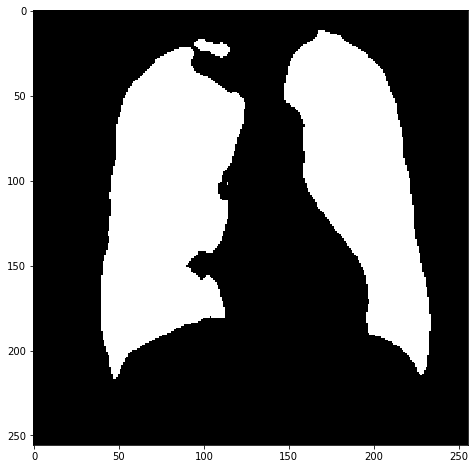

[0 1]


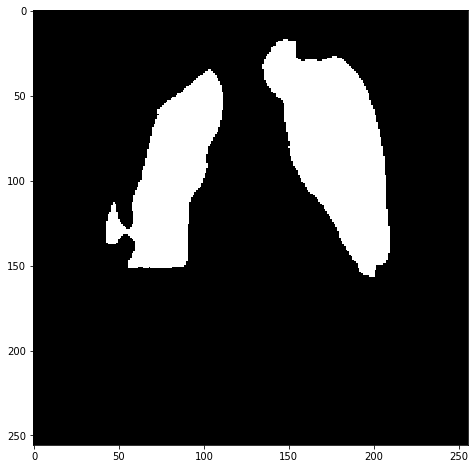

[0 1]


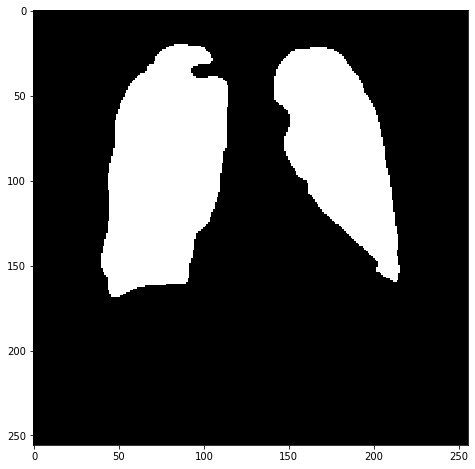

[0 1]


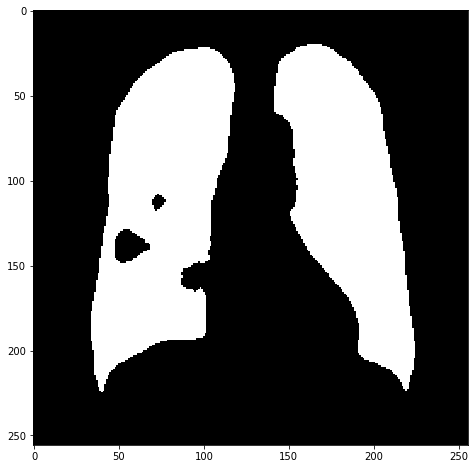

[0 1]


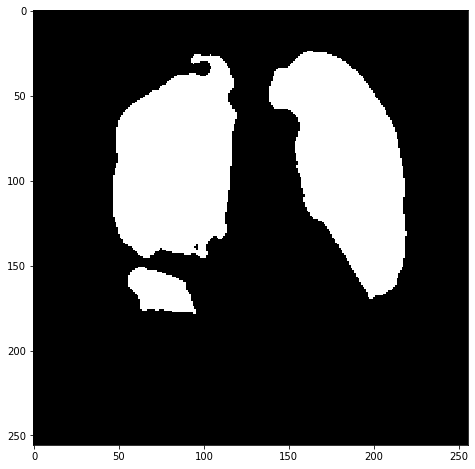

[0 1]


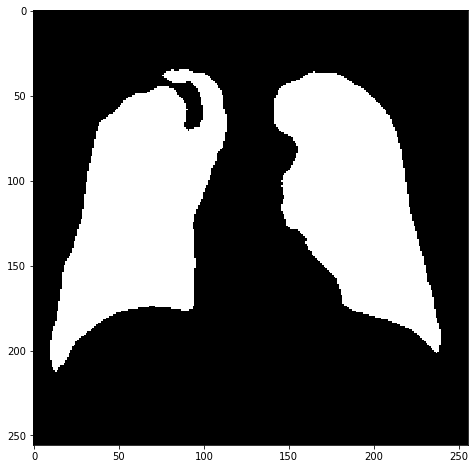

[0 1]


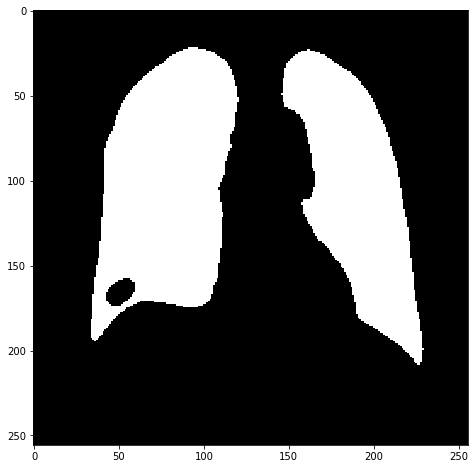

[0 1]


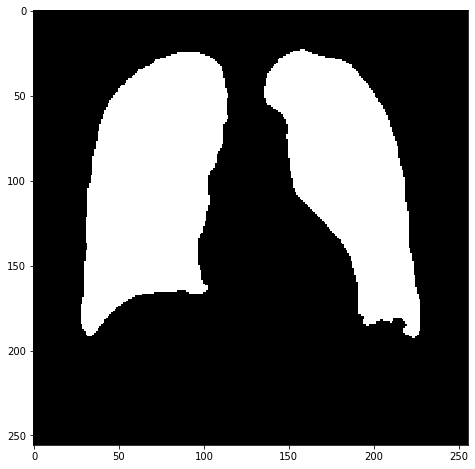

[0 1]


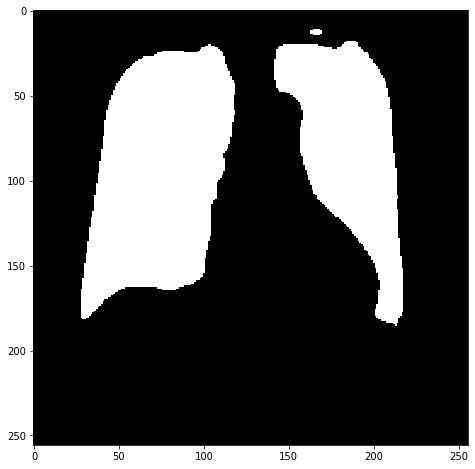

[0 1]


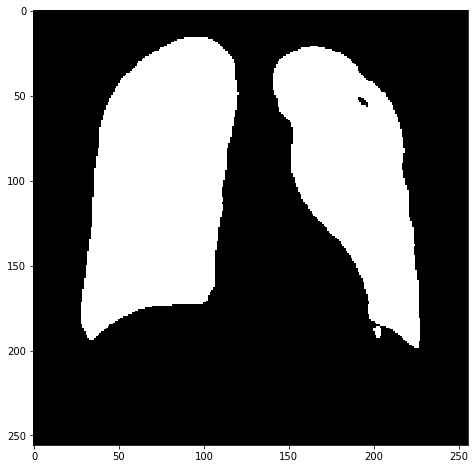

[0 1]


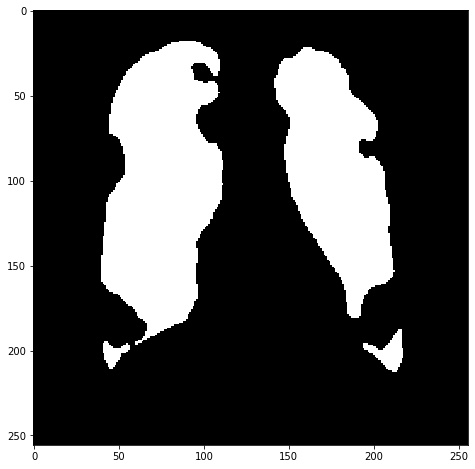

[0 1]


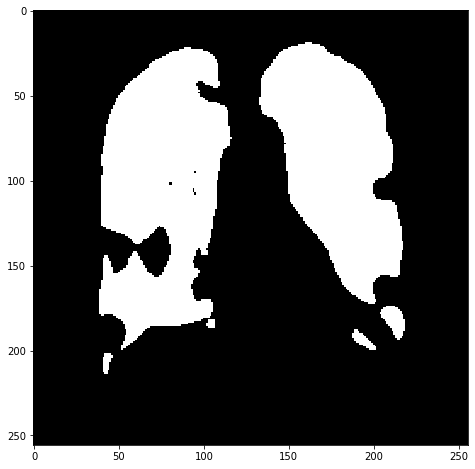

[0 1]


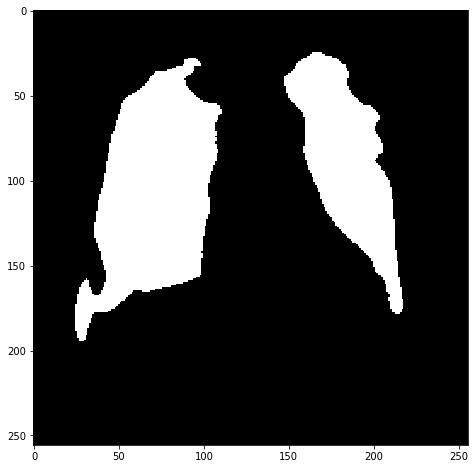

[0 1]


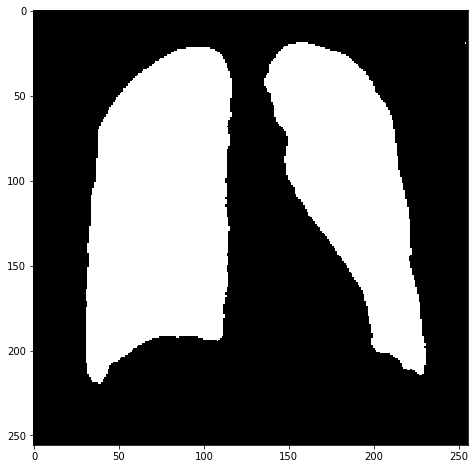

[0 1]


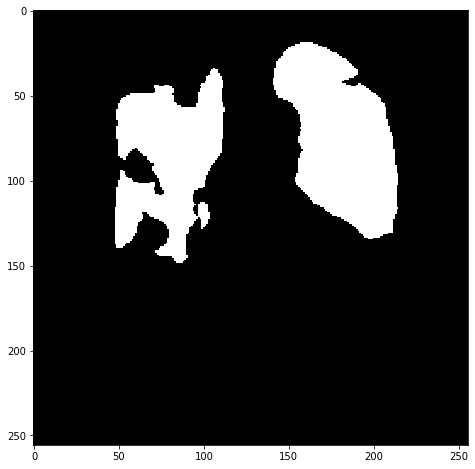

[0 1]


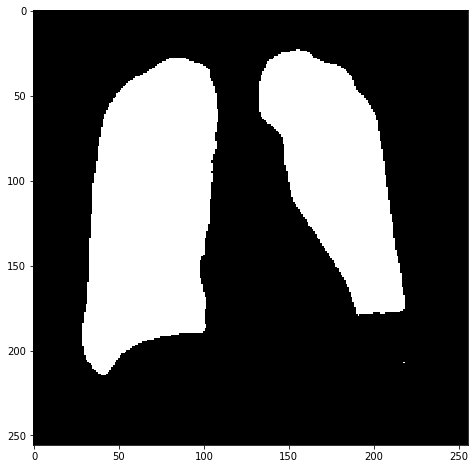

[0 1]


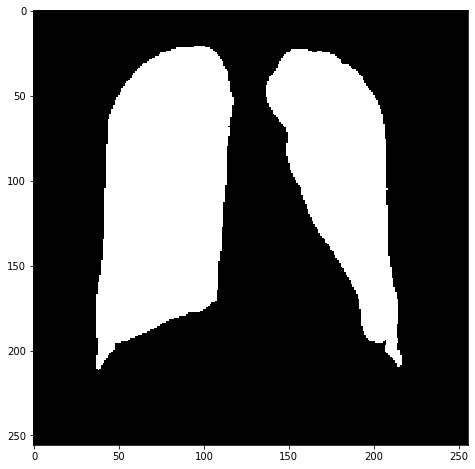

[0 1]


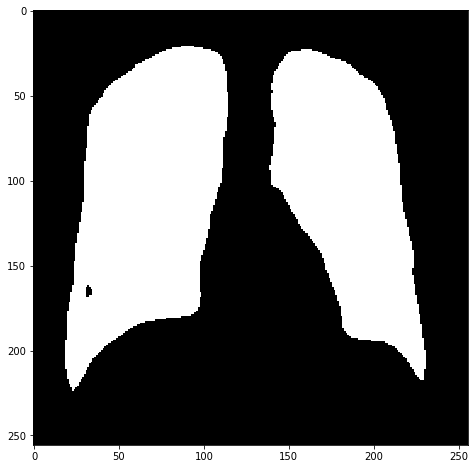

[0 1]


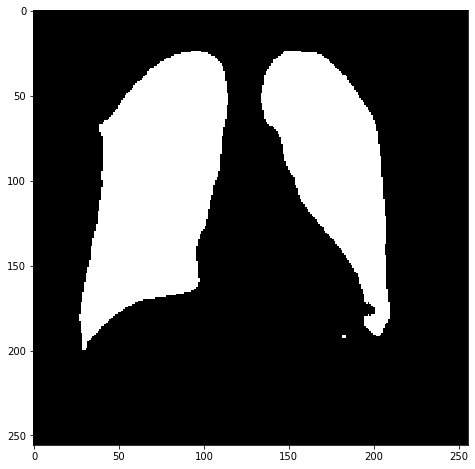

[0 1]


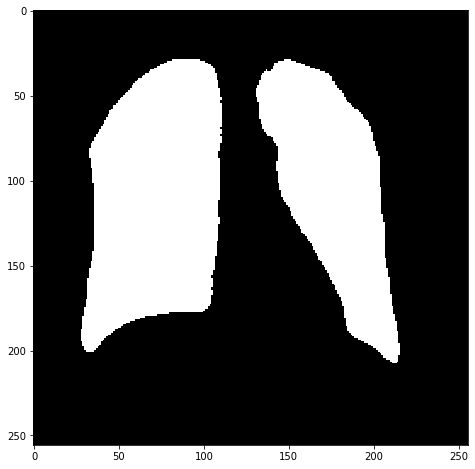

[0 1]


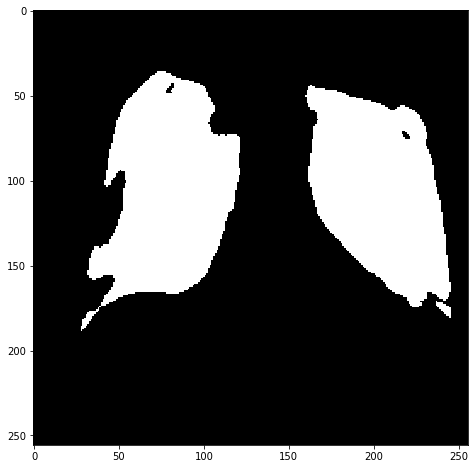

[0 1]


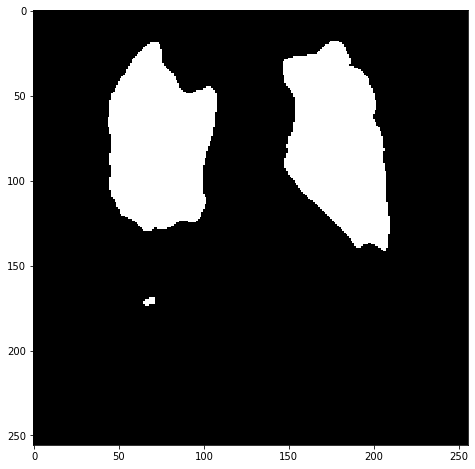

[0 1]


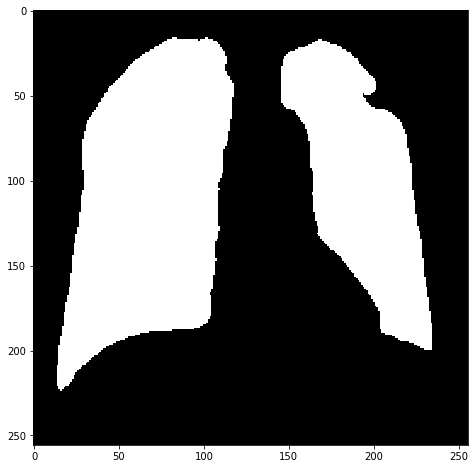

[0 1]


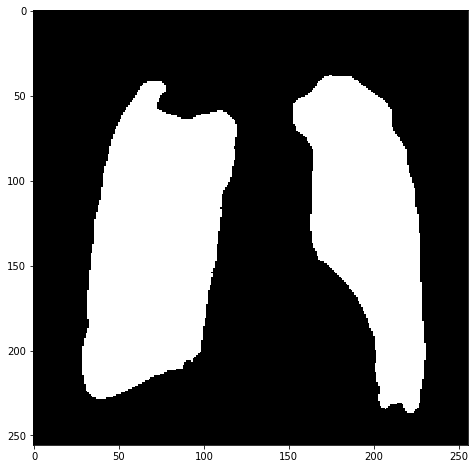

[0 1]


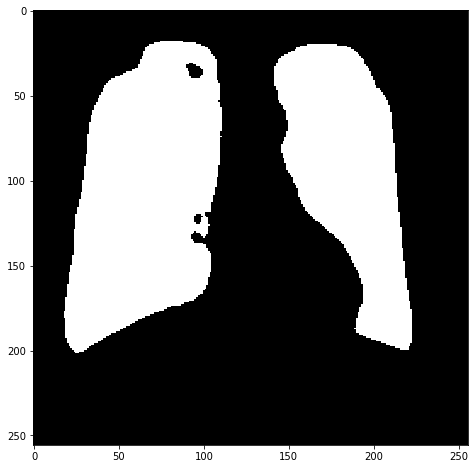

[0 1]


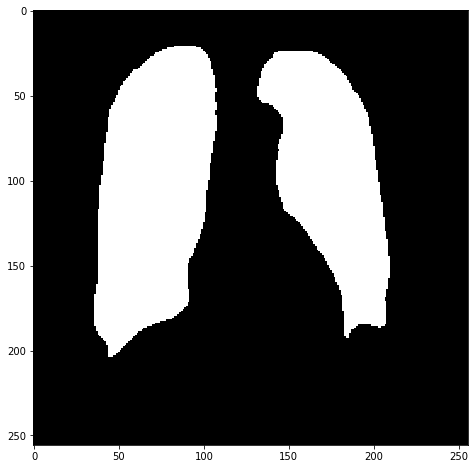

[0 1]


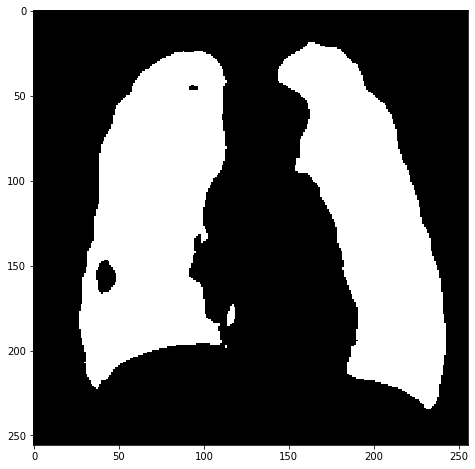

[0 1]


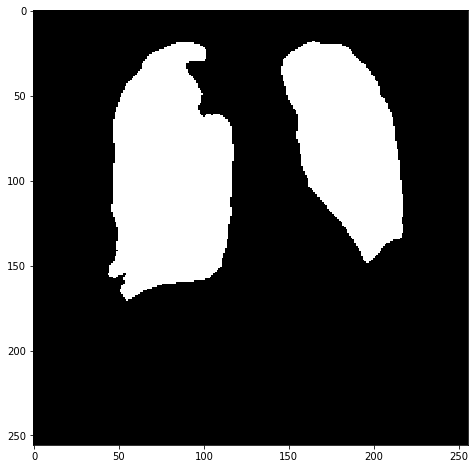

[0 1]


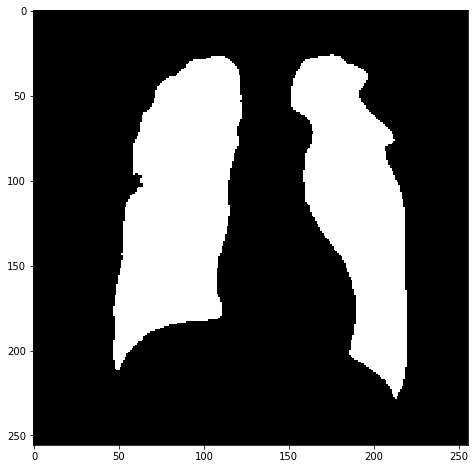

[0 1]


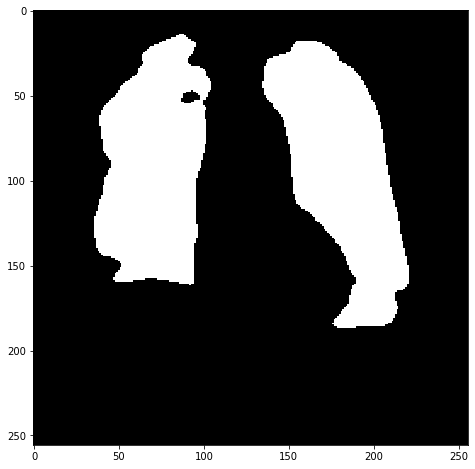

[0 1]


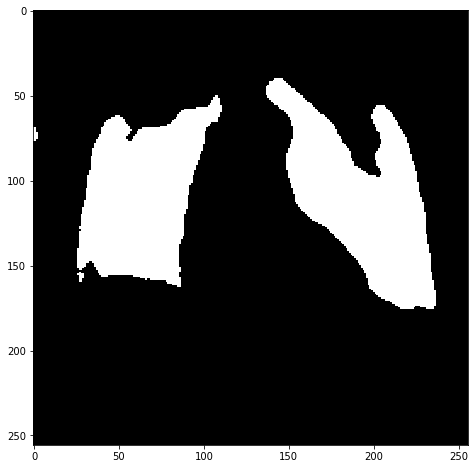

[0 1]


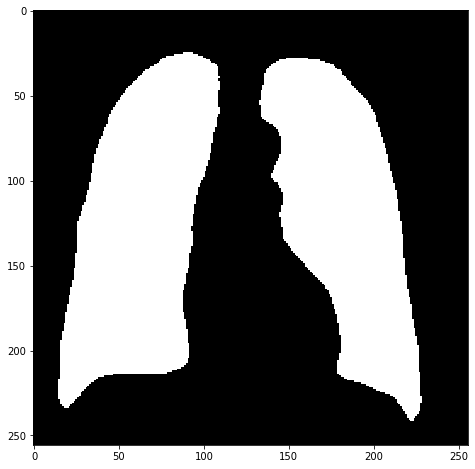

[0 1]


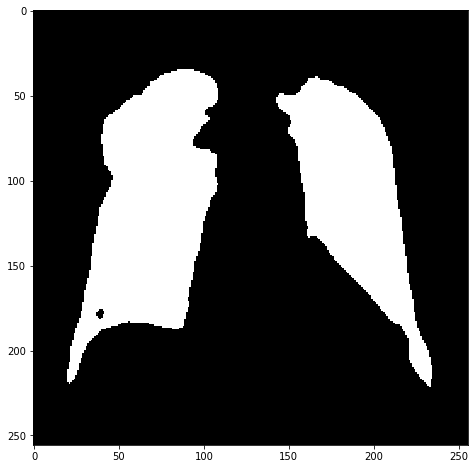

[0 1]


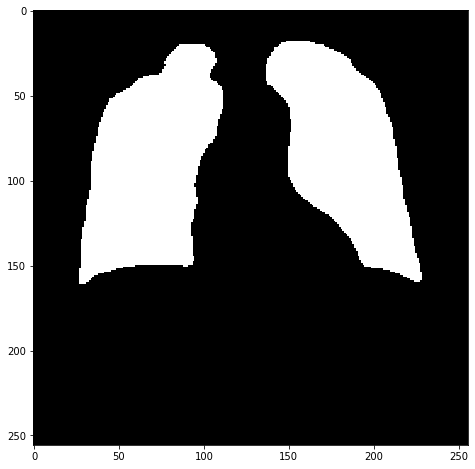

[0 1]


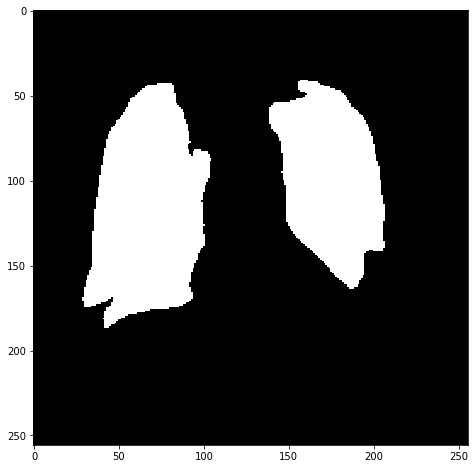

[0 1]


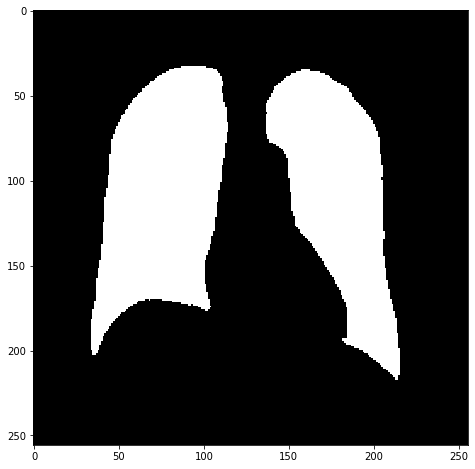

[0 1]


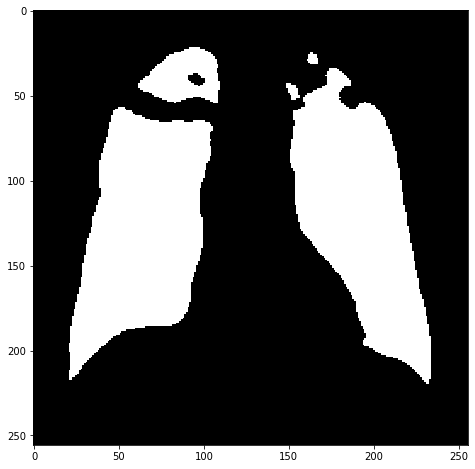

[0 1]


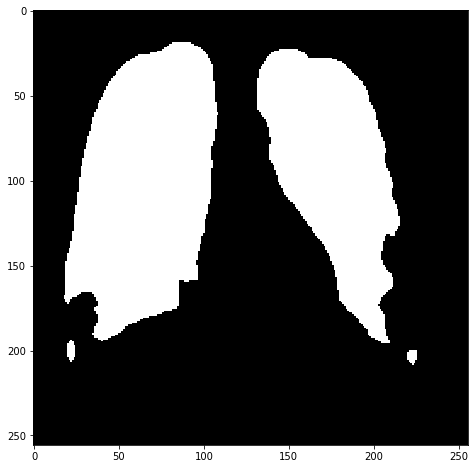

[0 1]


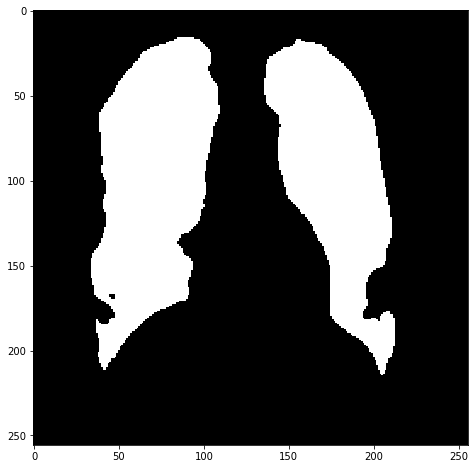

[0 1]


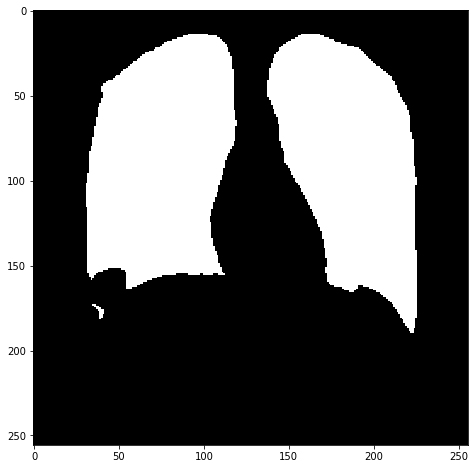

[0 1]


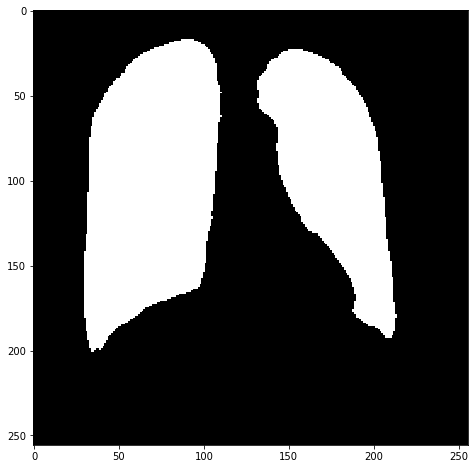

[0 1]


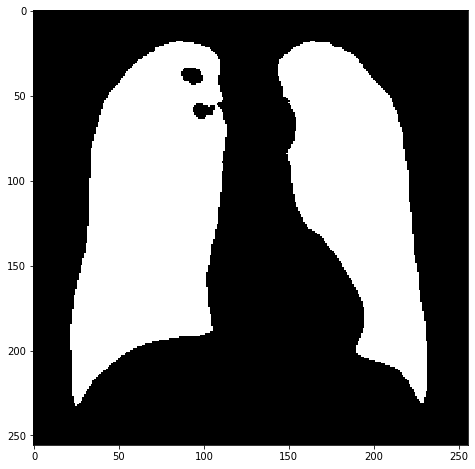

[0 1]


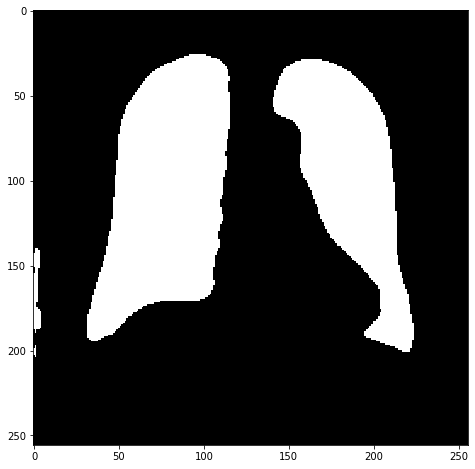

[0 1]


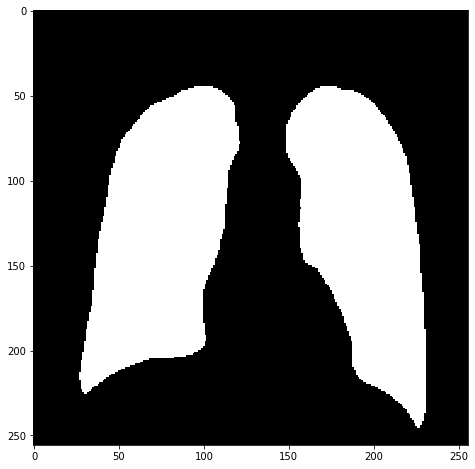

[0 1]


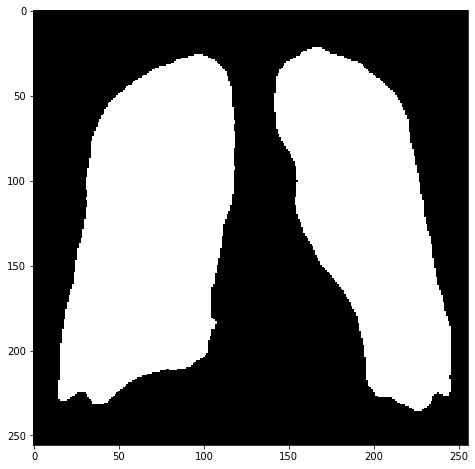

[0 1]


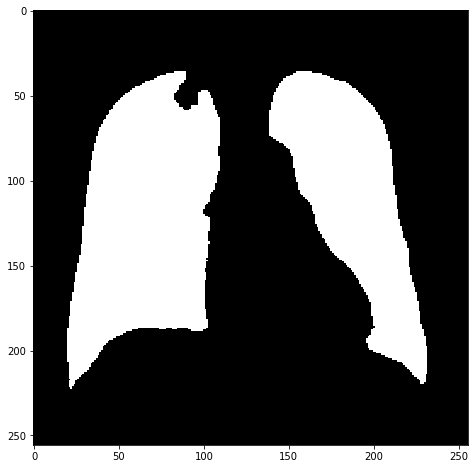

[0 1]


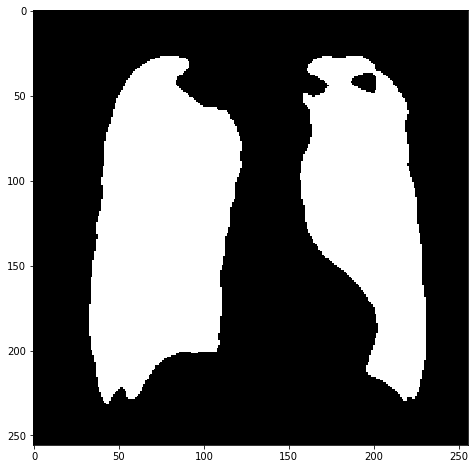

[0 1]


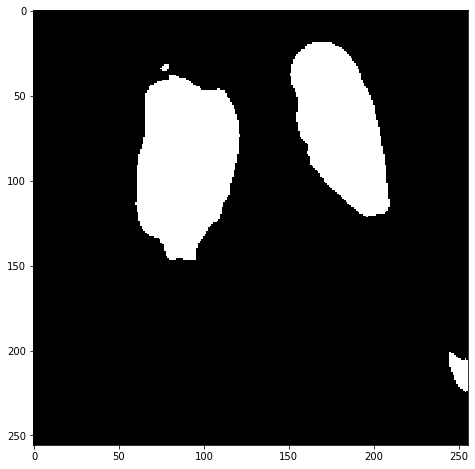

[0 1]


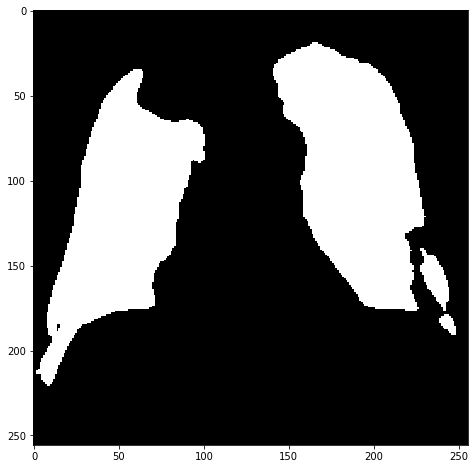

[0 1]


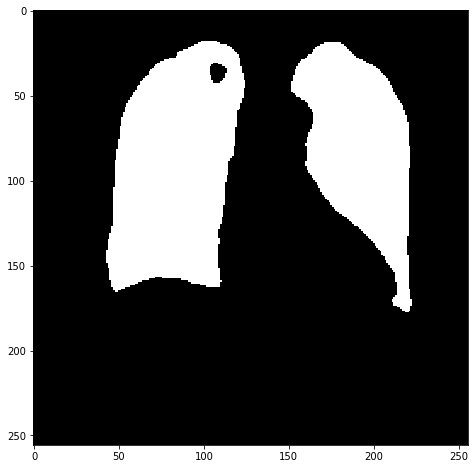

[0 1]


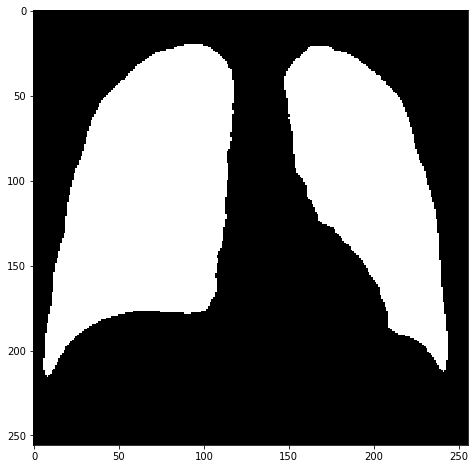

[0 1]


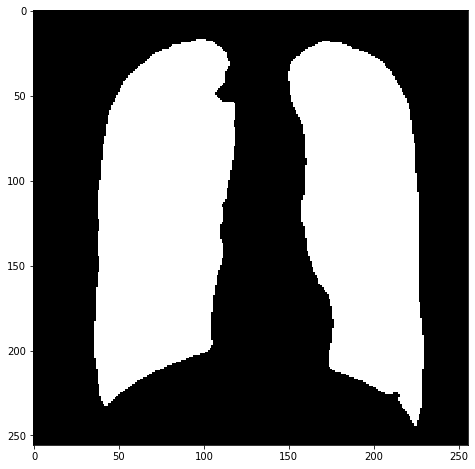

[0 1]


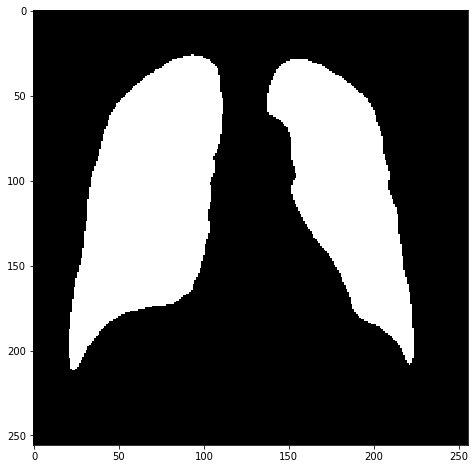

[0 1]


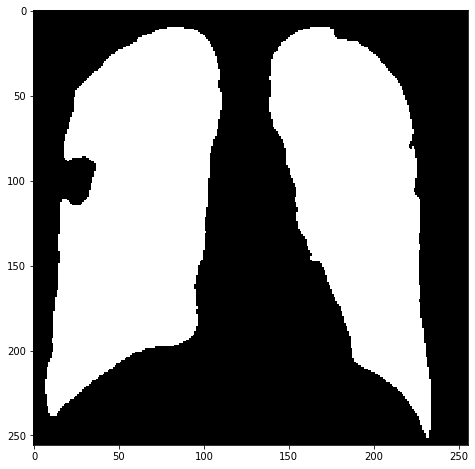

[0 1]


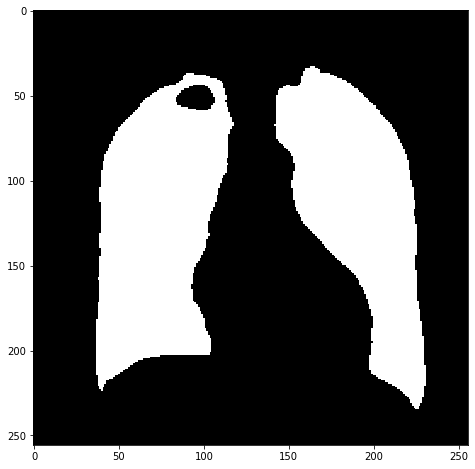

[0 1]


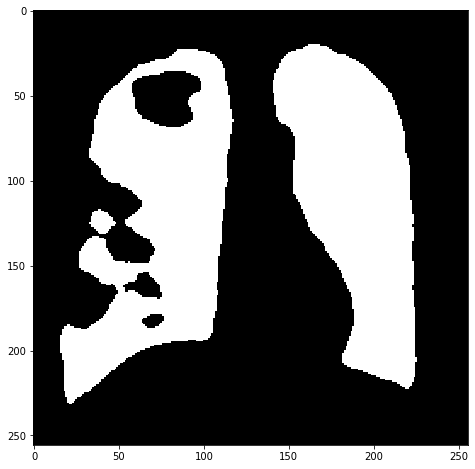

[0 1]


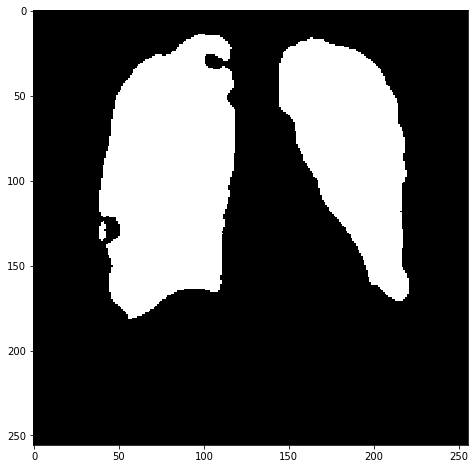

[0 1]


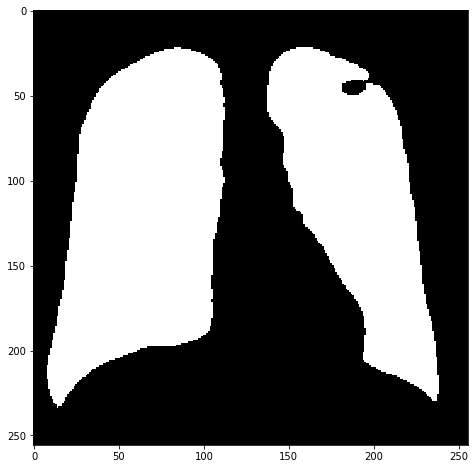

[0 1]


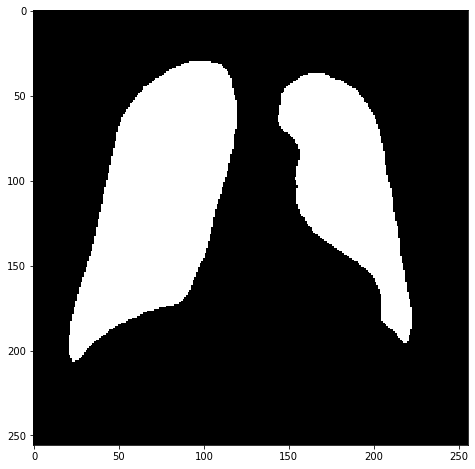

[0 1]


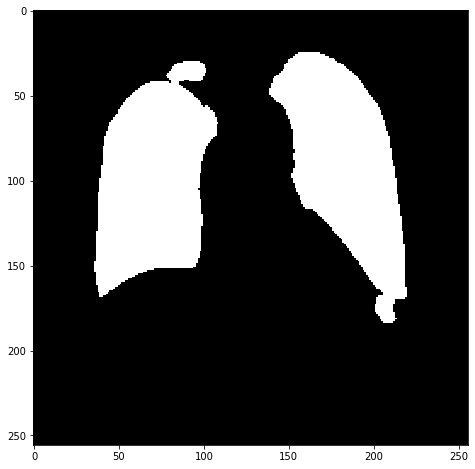

[0 1]


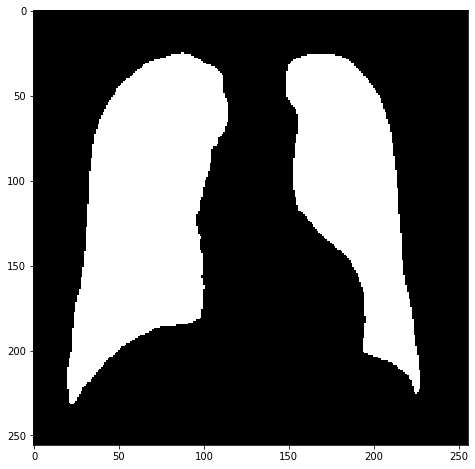

[0 1]


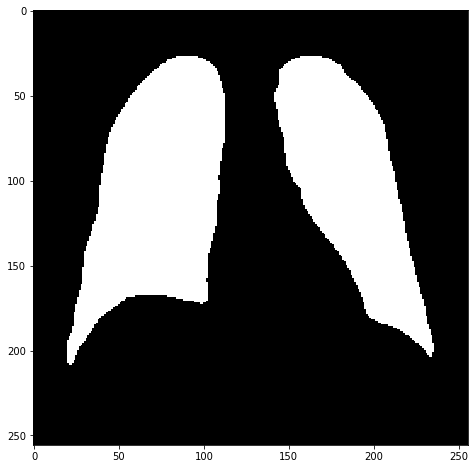

[0 1]


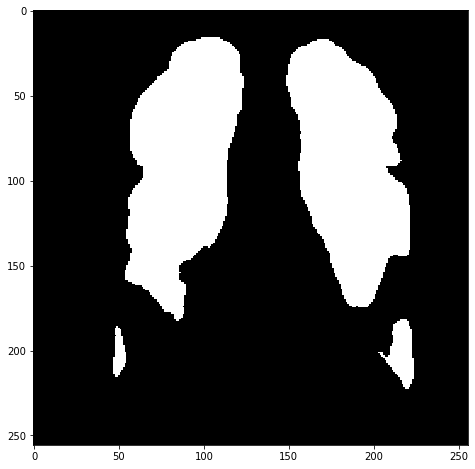

[0 1]


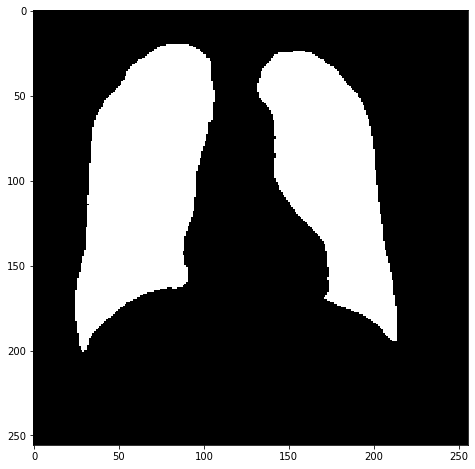

[0 1]


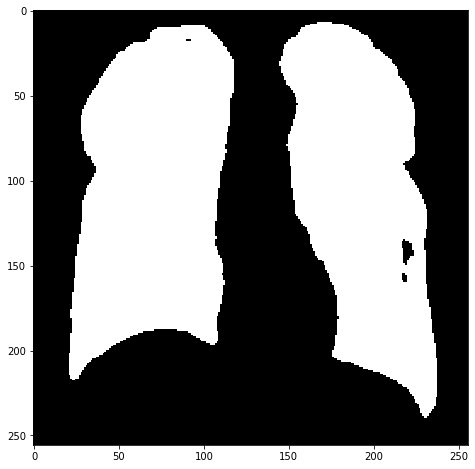

[0 1]


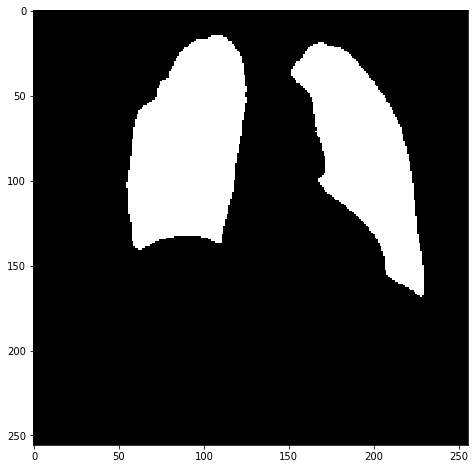

[0 1]


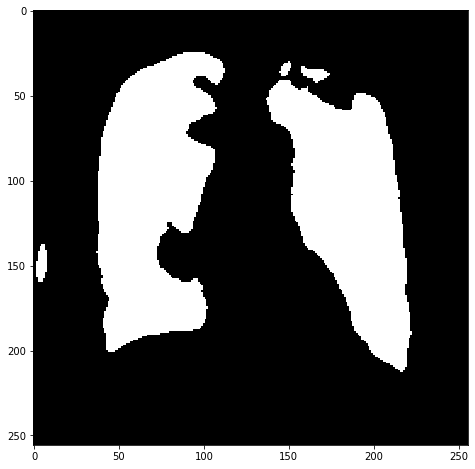

[0 1]


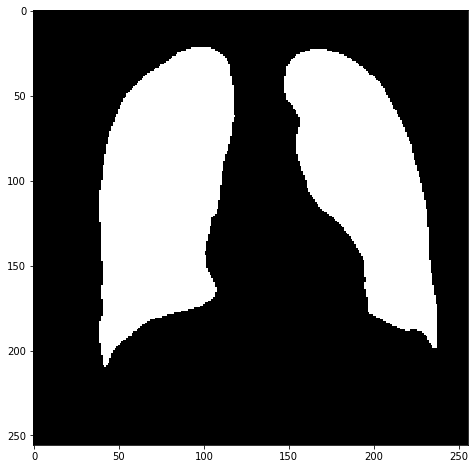

[0 1]


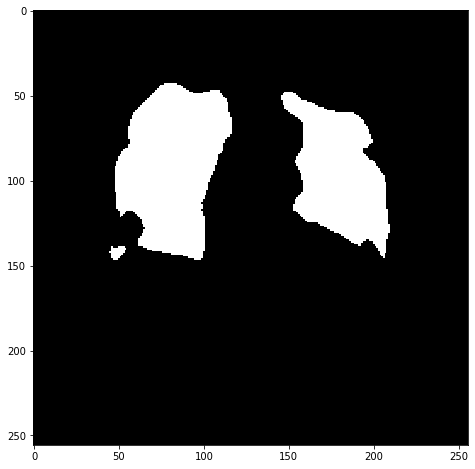

[0 1]


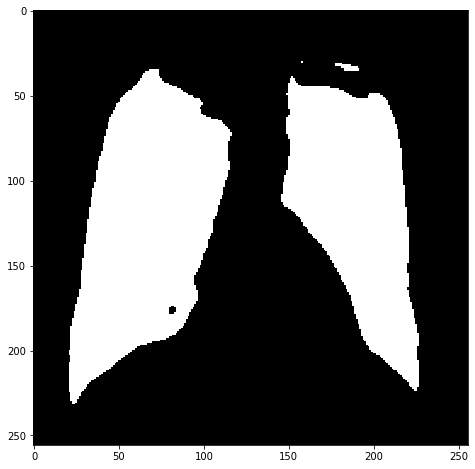

[0 1]


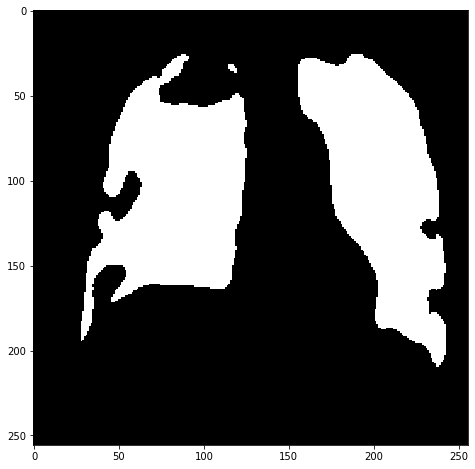

[0 1]


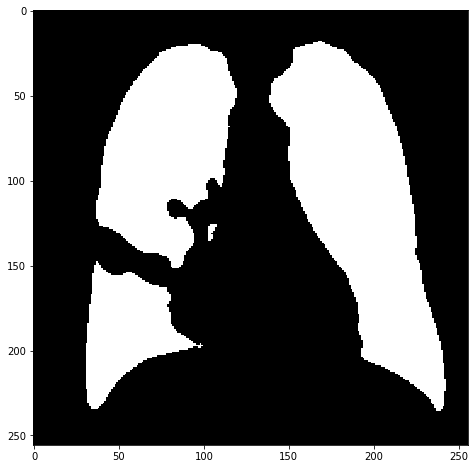

[0 1]


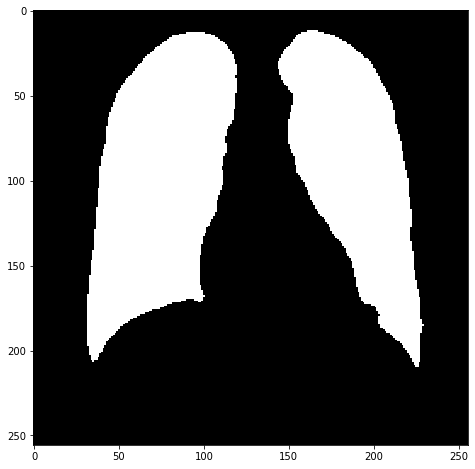

[0 1]


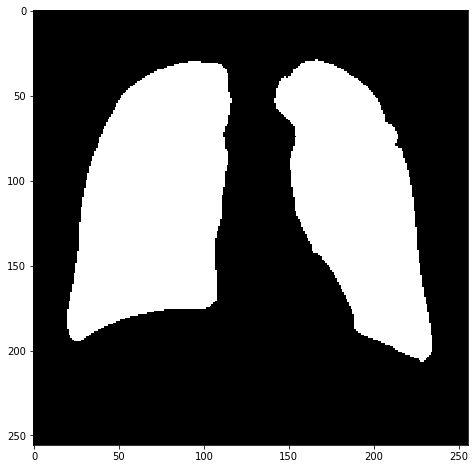

[0 1]


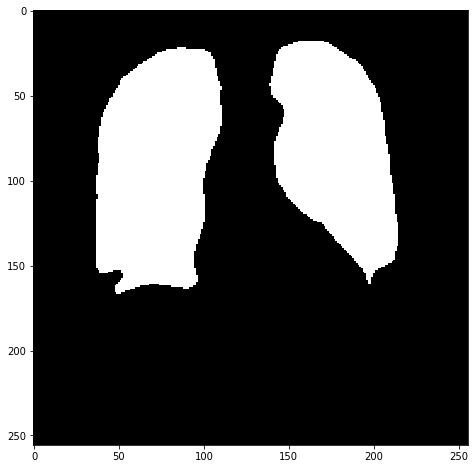

[0 1]


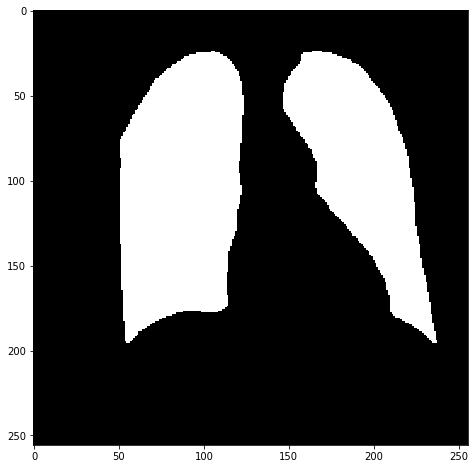

[0 1]


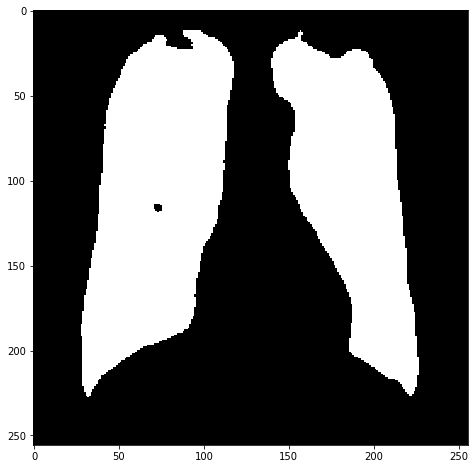

[0 1]


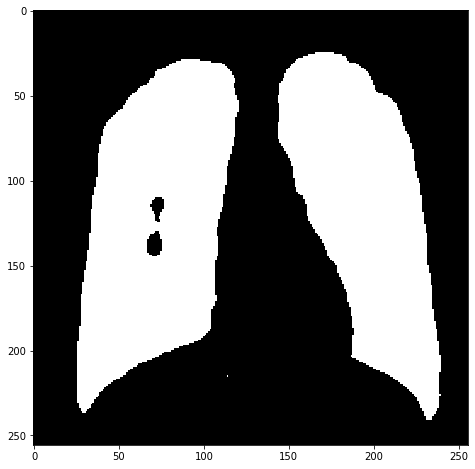

[0 1]


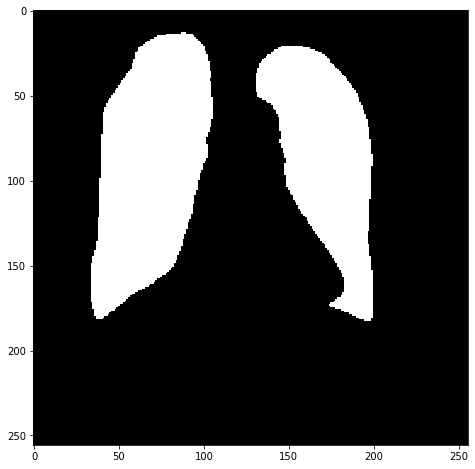

[0 1]


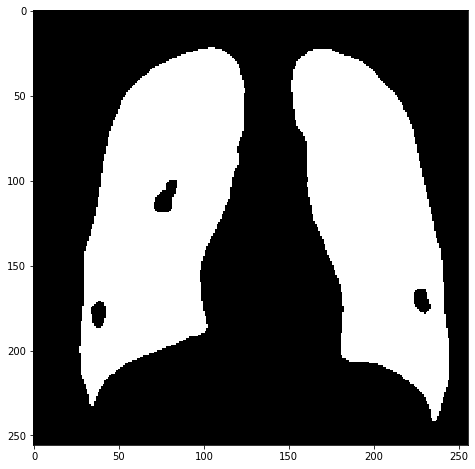

[0 1]


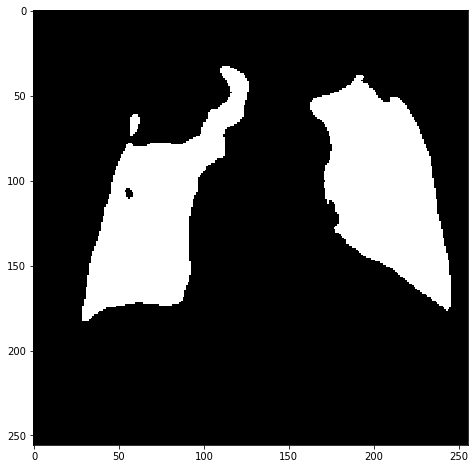

[0 1]


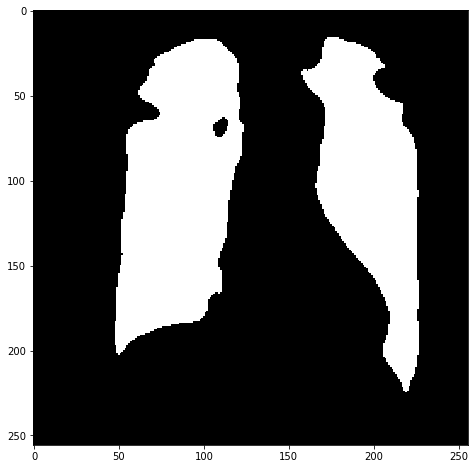

[0 1]


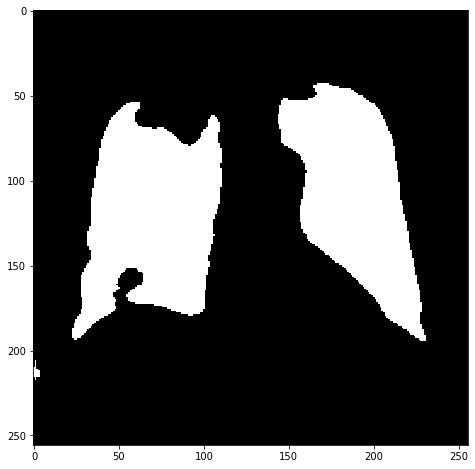

[0 1]


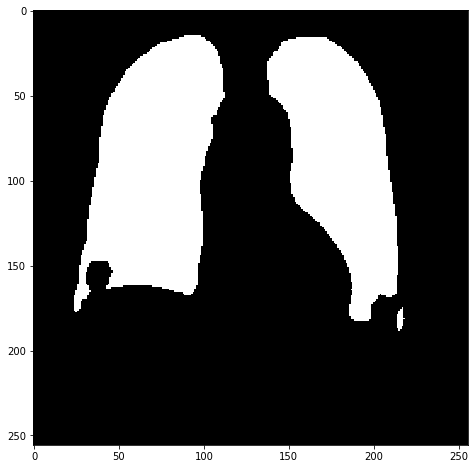

[0 1]


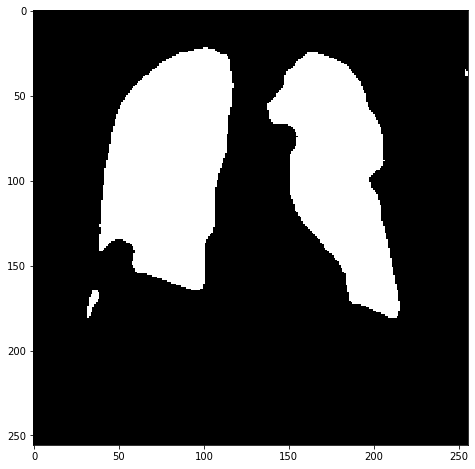

[0 1]


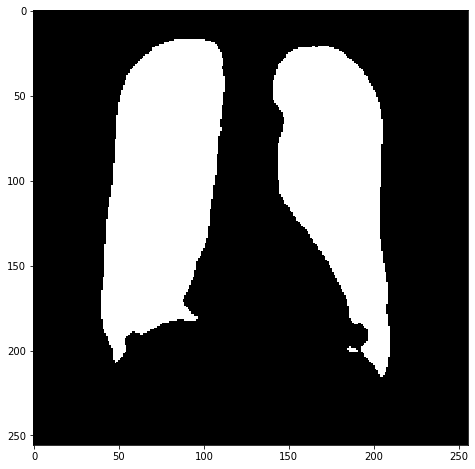

[0 1]


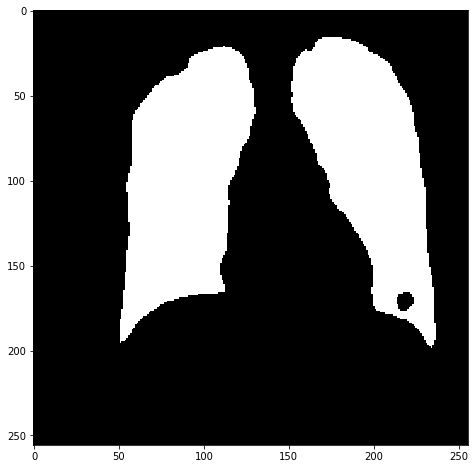

[0 1]


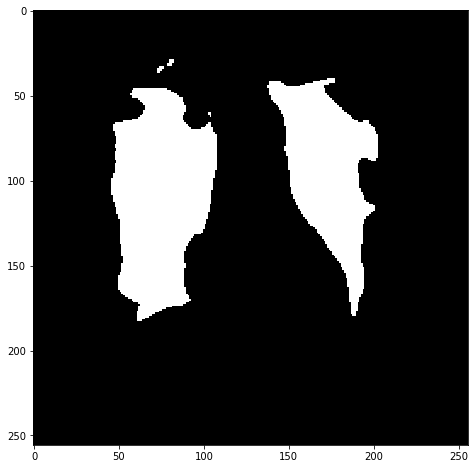

[0 1]


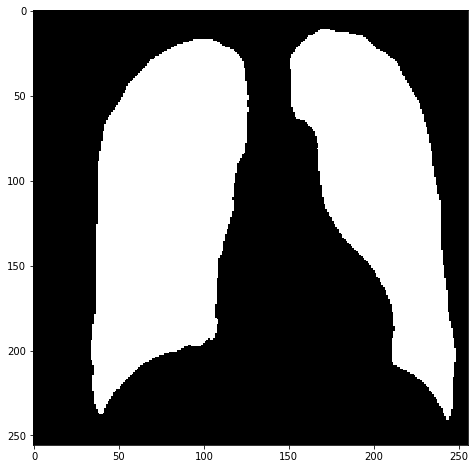

[0 1]


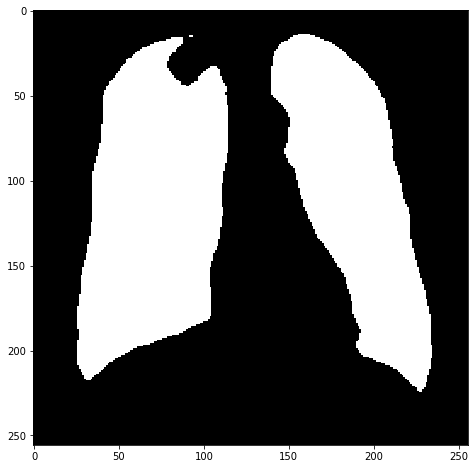

[0 1]


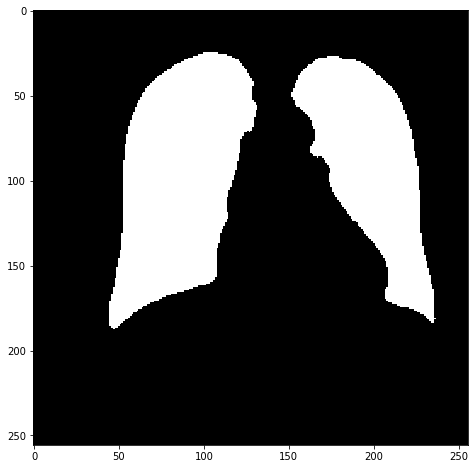

[0 1]


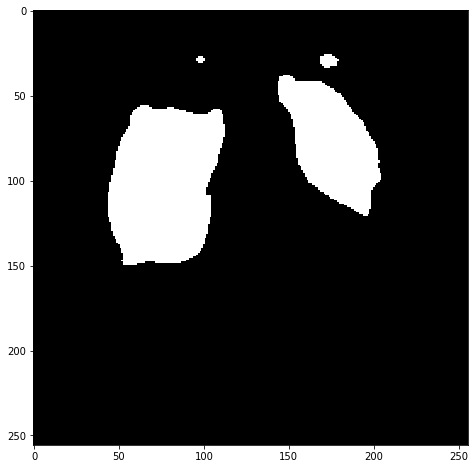

[0 1]


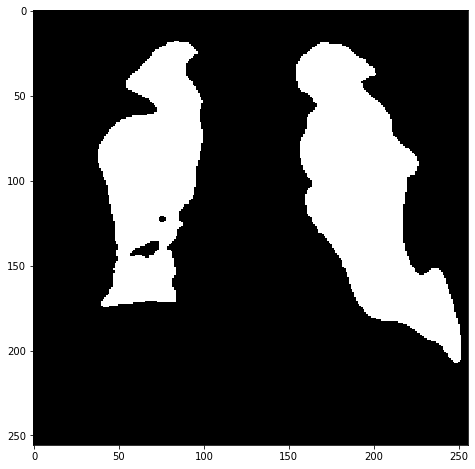

[0 1]


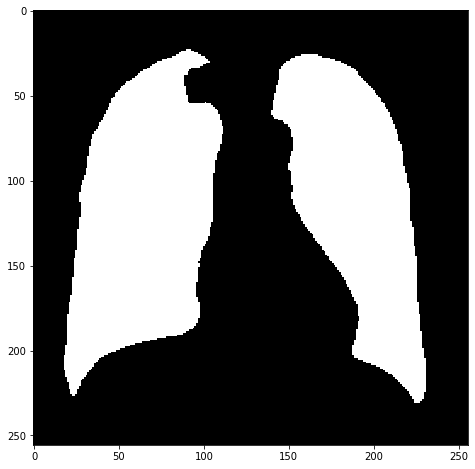

[0 1]


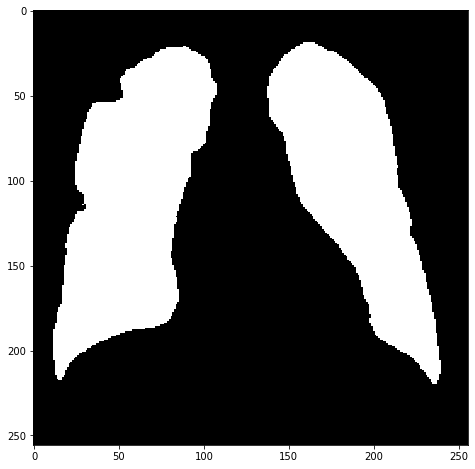

[0 1]


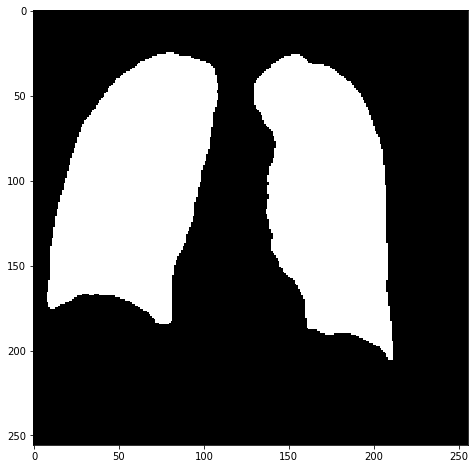

[0 1]


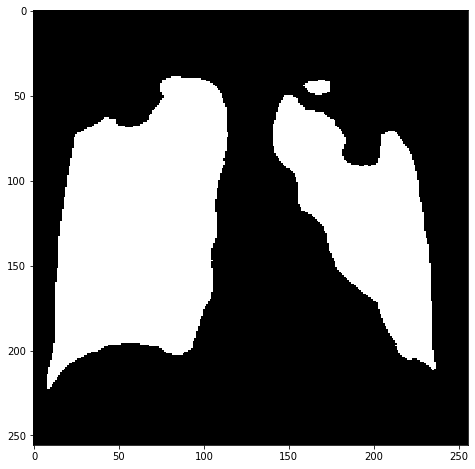

[0 1]


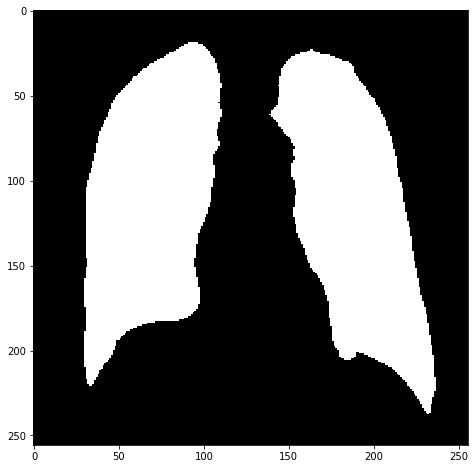

[0 1]


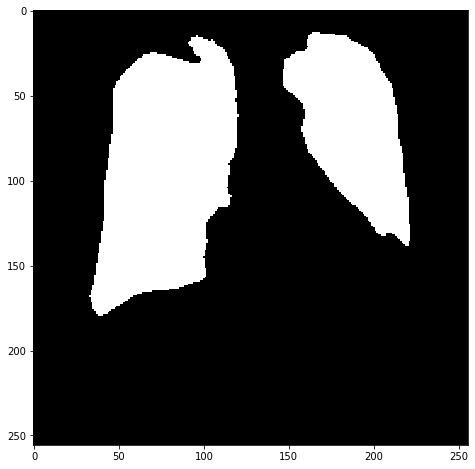

[0 1]


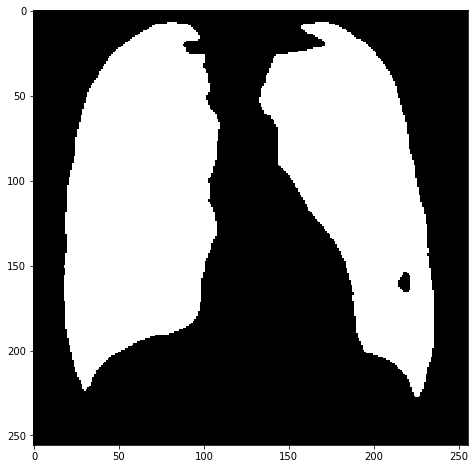

[0 1]


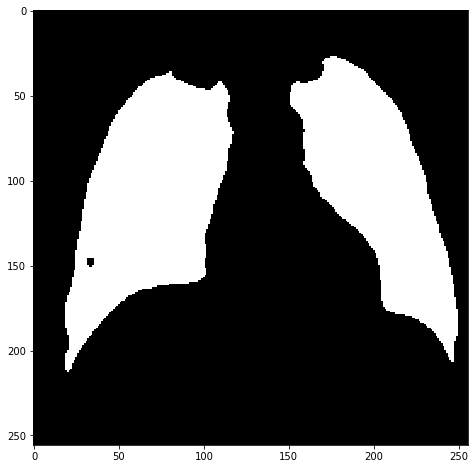

[0 1]


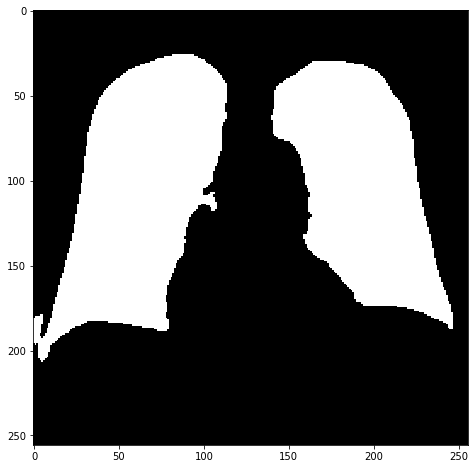

[0 1]


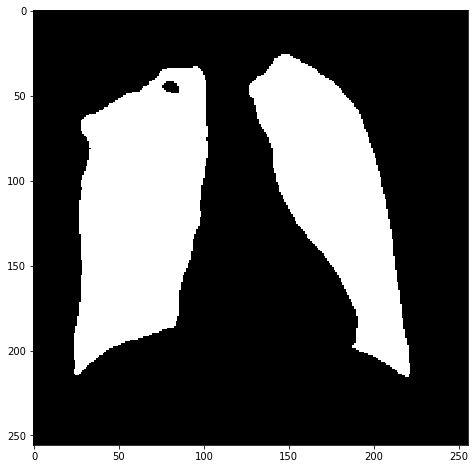

[0 1]


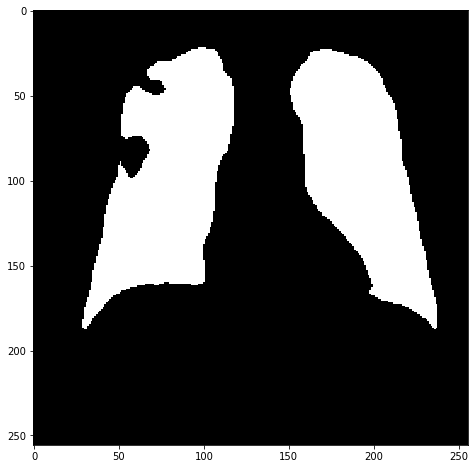

[0 1]


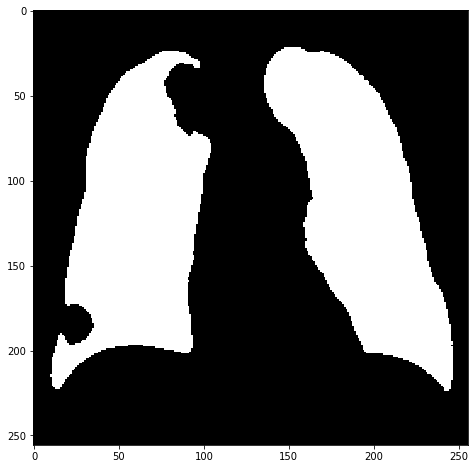

[0 1]


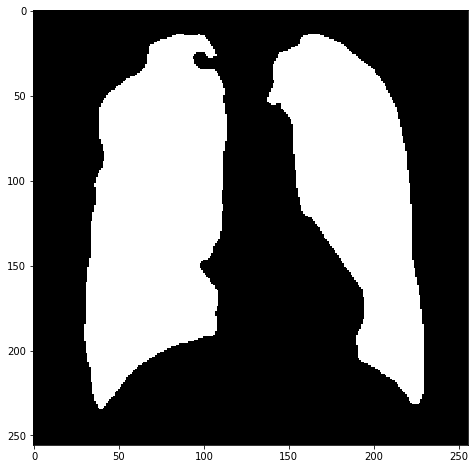

[0 1]


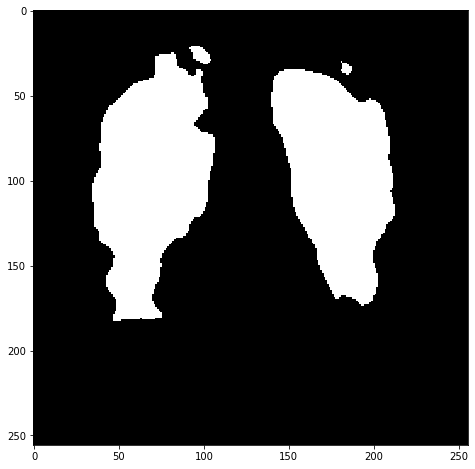

[0 1]


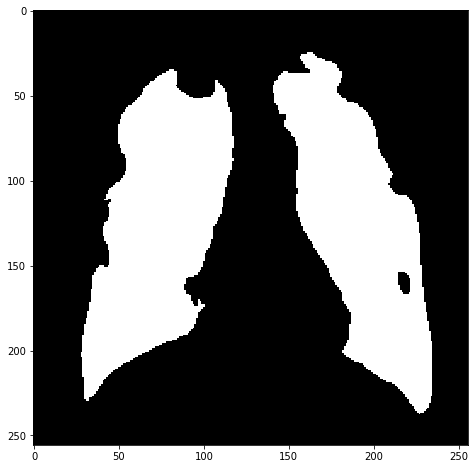

[0 1]


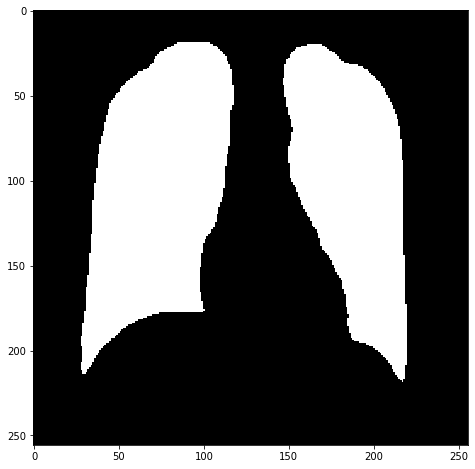

[0 1]


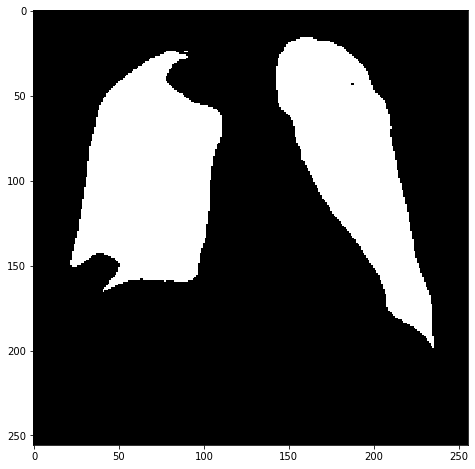

[0 1]


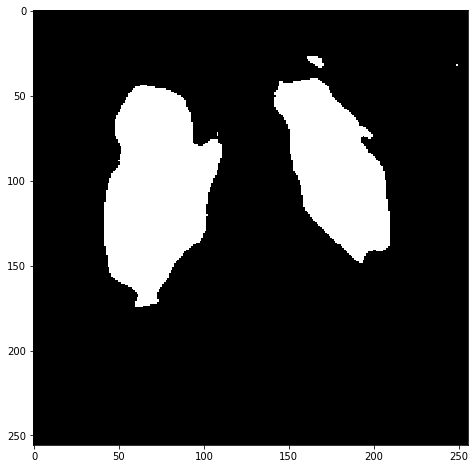

[0 1]


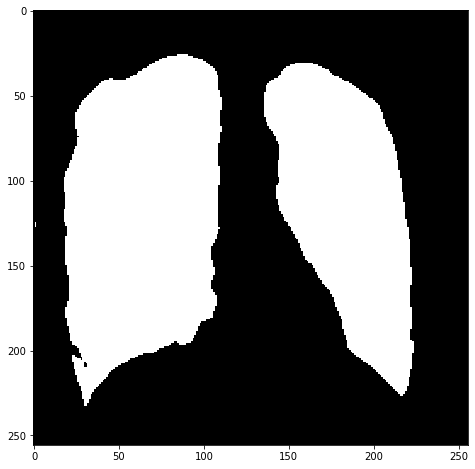

[0 1]


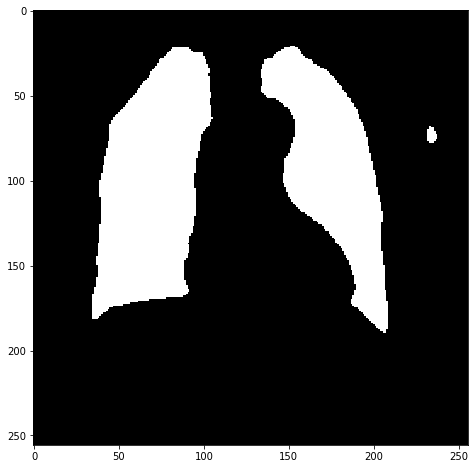

[0 1]


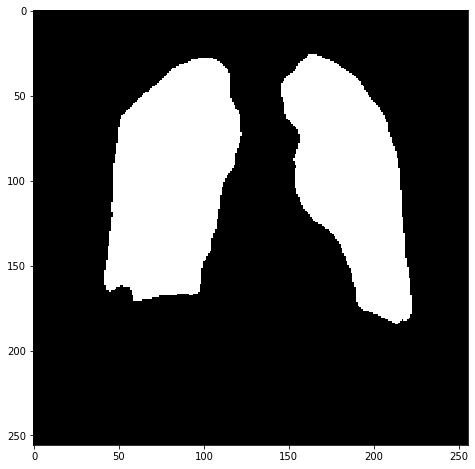

[0 1]


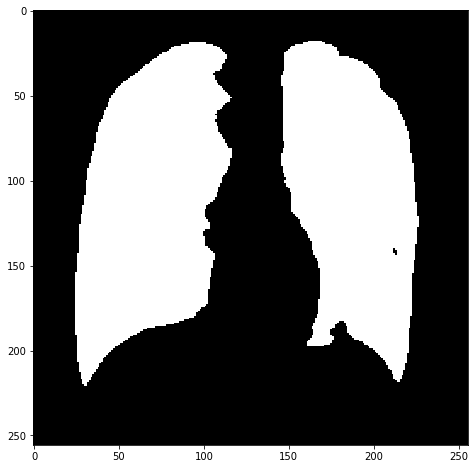

[0 1]


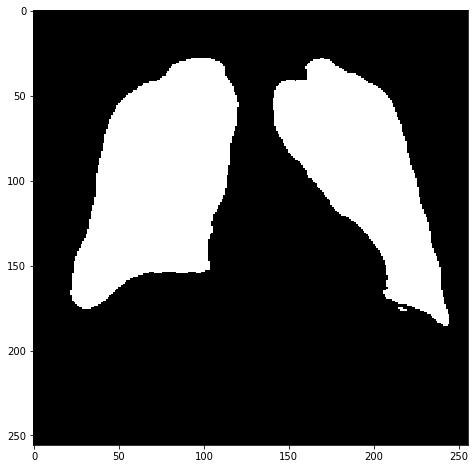

[0 1]


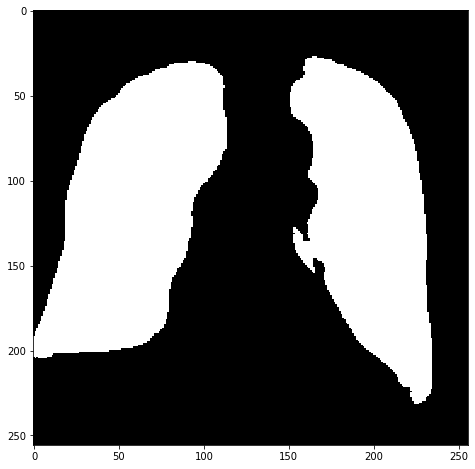

[0 1]


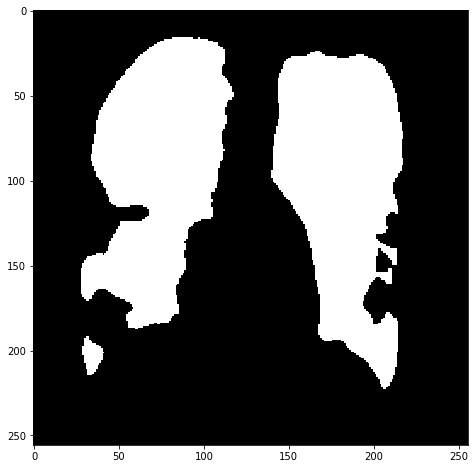

[0 1]


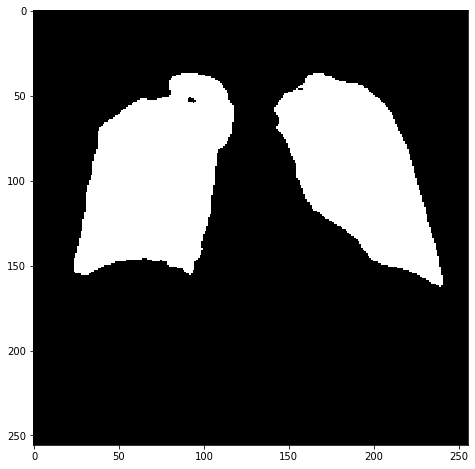

[0 1]


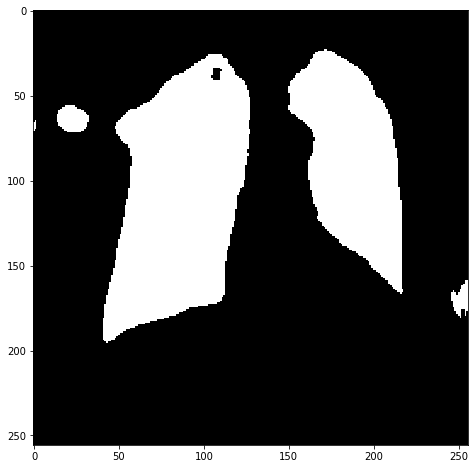

[0 1]


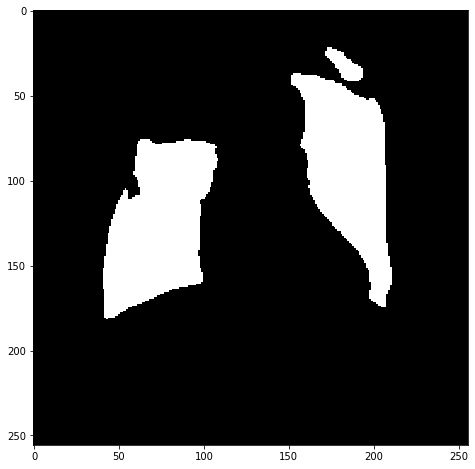

[0 1]


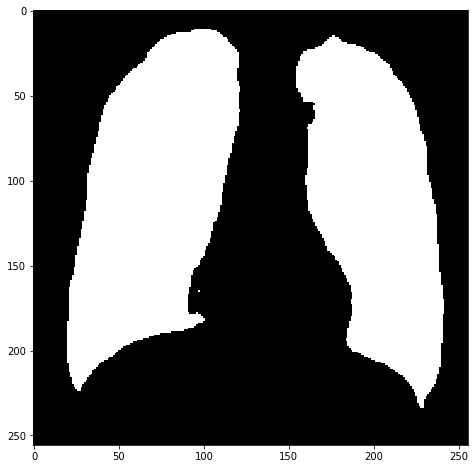

[0 1]


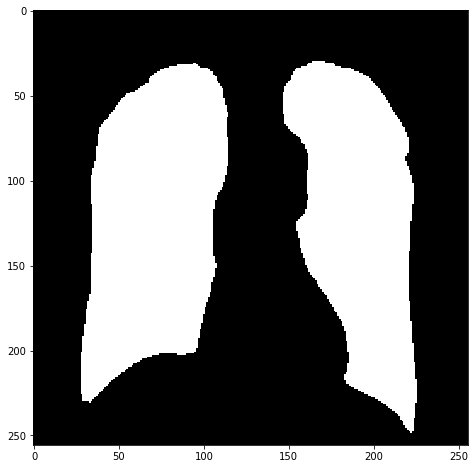

[0 1]


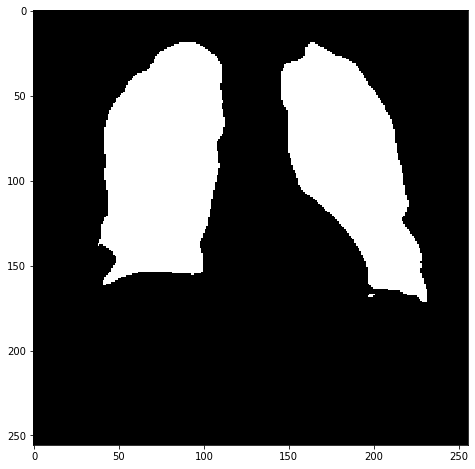

In [13]:
prediction = []
for j in range(len(filenames_im)):
    im = images[j].copy()
    im = im*1.0/np.max(im)
    im = im.reshape((1,1,im.shape[0], -1))
    im = torch.from_numpy(im)
    X = Variable(im).cuda().float()
      
    output = model(X)
    output2 = output.data.cpu().numpy()
    output2 = np.squeeze(output2[0])

    output2 = np.argmax(output2,0)
    output2 = np.squeeze(output2)
    print(np.unique(output2))
    plt.imshow(output2)
    plt.show()
    save_path = cwd + '\\medical_images\\prediction\\' + filenames_im[j]
    prediction.append(output2)
    cv2.imwrite(save_path, output2)